In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [3]:
ID = test['PassengerId']
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.isnull().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    bool 
 1   Survived     891 non-null    bool 
 2   Pclass       891 non-null    bool 
 3   Name         891 non-null    bool 
 4   Sex          891 non-null    bool 
 5   Age          891 non-null    bool 
 6   SibSp        891 non-null    bool 
 7   Parch        891 non-null    bool 
 8   Ticket       891 non-null    bool 
 9   Fare         891 non-null    bool 
 10  Cabin        891 non-null    bool 
 11  Embarked     891 non-null    bool 
dtypes: bool(12)
memory usage: 10.6 KB


In [6]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

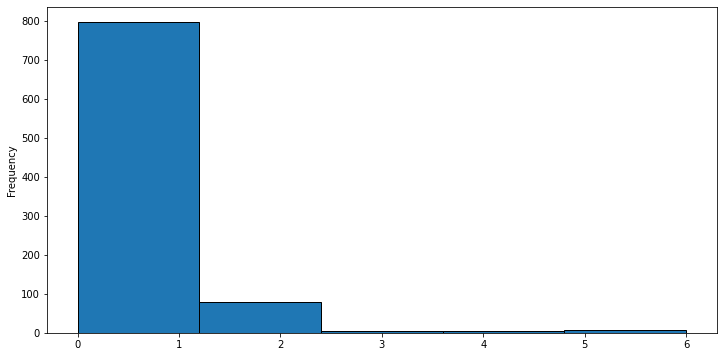

In [7]:
train['Parch'].plot(kind='hist', ec='black', bins=5, figsize=(12, 6))

<AxesSubplot:ylabel='Frequency'>

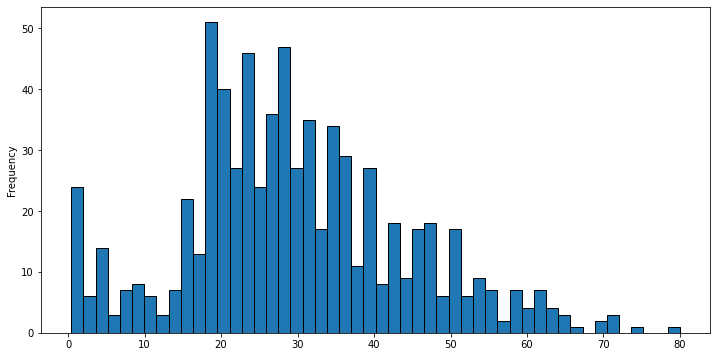

In [8]:
train['Age'].plot(kind='hist', ec='black', bins=50, figsize=(12, 6))

In [9]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
train[["Embarked","Name"]].groupby(by=["Embarked"],as_index=True).count().sort_values("Name",ascending=False)

,Name
Embarked,
S,644
C,168
Q,77


<AxesSubplot:xlabel='Embarked', ylabel='count'>

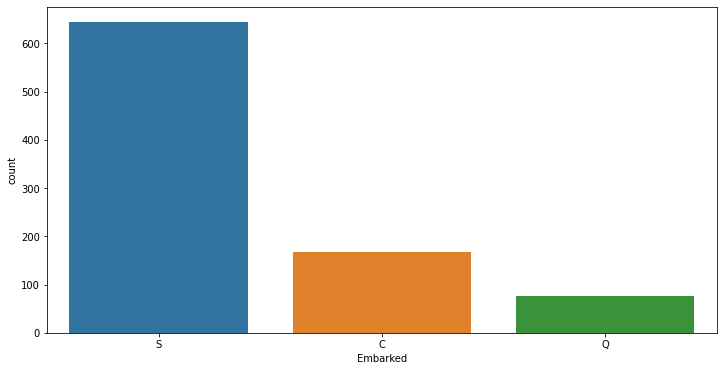

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(x=train['Embarked'])


In [12]:
train['Embarked'].fillna('S', inplace=True)

In [13]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [14]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [15]:
dc = {'S':1, 
     'C': 2,
     'Q': 3}


In [16]:
for value in dc:
    print(value)
    train['Embarked'].replace({value: dc[value]}, inplace=True)
    test['Embarked'].replace({value: dc[value]}, inplace=True)
    

S
C
Q


In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1


In [18]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,3
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,1


In [19]:
train.drop("Cabin", axis=1, inplace=True)
test.drop("Cabin", axis=1, inplace=True)

<AxesSubplot:ylabel='Frequency'>

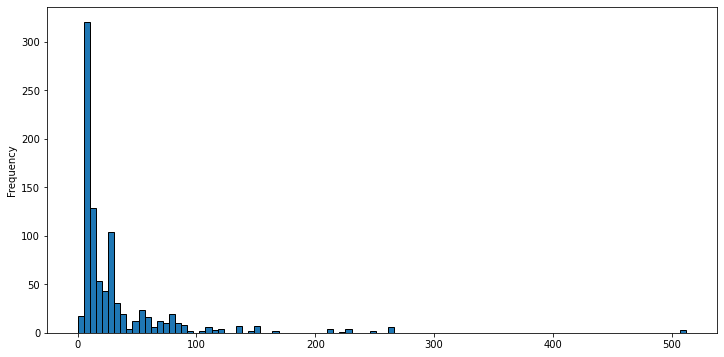

In [20]:
train['Fare'].plot(kind='hist', ec = 'black', bins=100, figsize=(12, 6))

In [21]:
train['Fare'].replace({np.nan: train['Fare'].mode()[0]}, inplace=True)

In [22]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [23]:
train['Age'].replace({np.nan: train['Age'].mean()}, inplace=True)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1


In [25]:
train.drop(['Ticket'], axis=1, inplace=True)

In [26]:
test.drop(['Ticket'], axis=1, inplace=True)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 69.7+ KB


In [28]:
test.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

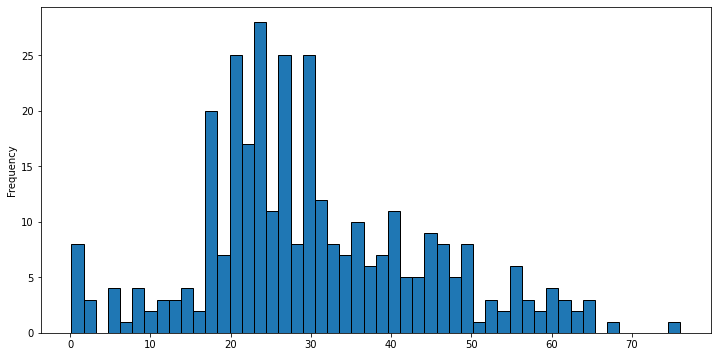

In [29]:
test['Age'].plot(kind='hist', ec='black', bins=50, figsize=(12, 6))

In [30]:
test['Age'].replace({np.nan: test['Age'].mode()[0]}, inplace=True)

In [31]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,3
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,1


In [32]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [33]:
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)

test['Embarked'].mode()[0]

1

In [34]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [35]:
test['Fare'].fillna(test['Fare'].mode()[0], inplace=True)

In [36]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [37]:
train.shape

(891, 10)

In [38]:
test.shape

(418, 9)

In [39]:
dc1 = {"male": 1, 'female': 0}
for value in dc1:
    print(value)
    train['Sex'].replace({value: dc1[value]}, inplace=True)
    test['Sex'].replace({value: dc1[value]}, inplace=True)
    

male
female


In [40]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,3
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,1


In [41]:
train["Title"] = 0

titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
data = [train, test]
for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace(['Mlle','Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)


In [42]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,1,22.0,1,0,7.2500,1,1
1,2,1,1,0,38.0,1,0,71.2833,2,3
2,3,1,3,0,26.0,0,0,7.9250,1,2
3,4,1,1,0,35.0,1,0,53.1000,1,3
4,5,0,3,1,35.0,0,0,8.0500,1,1


<AxesSubplot:xlabel='Age', ylabel='Survived'>

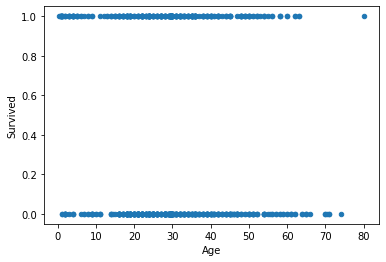

In [43]:
train.plot(kind='scatter', x='Age', y = 'Survived')

<AxesSubplot:>

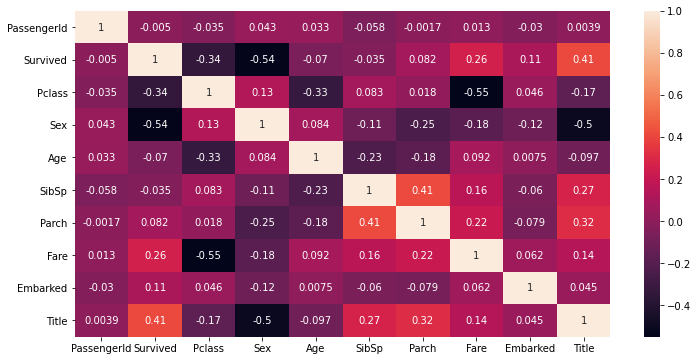

In [44]:
plt.figure(figsize=(12, 6))
sns.heatmap(data=train.corr(), annot=True)

In [45]:
test.drop('Age', axis= 1, inplace=True)
train.drop('Age', axis= 1, inplace=True)

In [46]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,1,1,0,7.2500,1,1
1,2,1,1,0,1,0,71.2833,2,3
2,3,1,3,0,0,0,7.9250,1,2
3,4,1,1,0,1,0,53.1000,1,3
4,5,0,3,1,0,0,8.0500,1,1


In [47]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title
0,892,3,1,0,0,7.8292,3,1
1,893,3,0,1,0,7.0000,1,3
2,894,2,1,0,0,9.6875,3,1
3,895,3,1,0,0,8.6625,1,1
4,896,3,0,1,1,12.2875,1,3


In [48]:
data = [train, test]
for dataset in data:
    dataset['FamilySize'] = dataset['SibSp'] +  dataset['Parch'] + 1

In [49]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,1,0,3,1,1,0,7.2500,1,1,2
1,2,1,1,0,1,0,71.2833,2,3,2
2,3,1,3,0,0,0,7.9250,1,2,1
3,4,1,1,0,1,0,53.1000,1,3,2
4,5,0,3,1,0,0,8.0500,1,1,1


In [50]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,FamilySize
0,892,3,1,0,0,7.8292,3,1,1
1,893,3,0,1,0,7.0000,1,3,2
2,894,2,1,0,0,9.6875,3,1,1
3,895,3,1,0,0,8.6625,1,1,1
4,896,3,0,1,1,12.2875,1,3,3


In [51]:
for dataset in data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

In [52]:
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


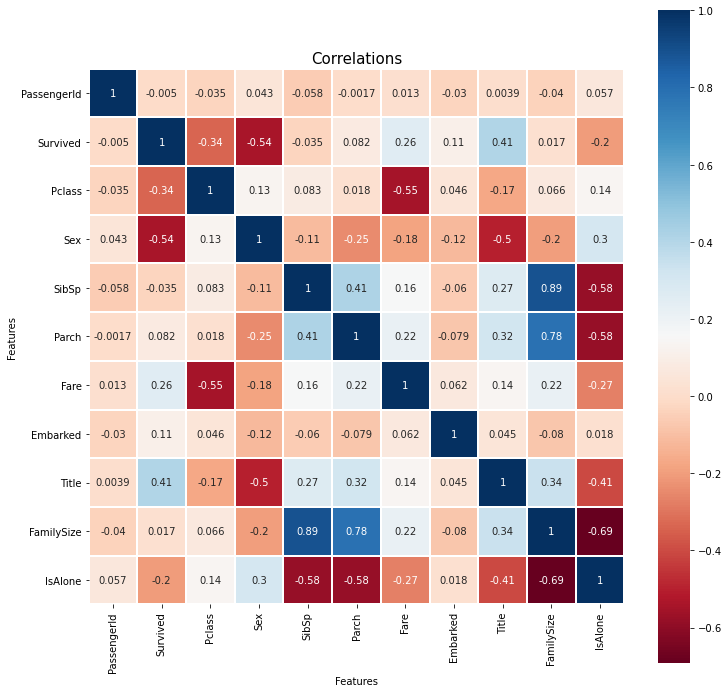

In [53]:
colormap=plt.cm.RdBu
figure = plt.figure(figsize=(12,12))
sns.heatmap(train.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.title("Correlations",size=15)
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [54]:
test.shape

(418, 10)

In [55]:
train.shape

(891, 11)

In [56]:
X, y = train.drop(['Survived', 'PassengerId'], axis=1), train['Survived']
from sklearn.model_selection import train_test_split
X_tr, x_ts, y_tr, y_ts = train_test_split(X, y, random_state=10, test_size=0.2)

In [57]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_tr, y_tr)


RandomForestClassifier()

In [58]:
# forest.score(X.head(418), forest.predict(test))

In [59]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_tr, y_tr)

c:\users\qodirjon\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_tr, y_tr)


DecisionTreeClassifier()

In [61]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
svm.fit(X_tr, y_tr)


SVC(kernel='linear')

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_tr, y_tr)


KNeighborsClassifier()

In [63]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=1000, learning_rate=0.3, verbose=True)
cat.fit(X_tr, y_tr,
       eval_set=(x_ts, y_ts),
       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5586348	test: 0.5495653	best: 0.5495653 (0)	total: 59.3ms	remaining: 59.3s
1:	learn: 0.4789401	test: 0.4575320	best: 0.4575320 (1)	total: 63.2ms	remaining: 31.5s
2:	learn: 0.4415246	test: 0.4197093	best: 0.4197093 (2)	total: 67.2ms	remaining: 22.3s
3:	learn: 0.4190075	test: 0.3997453	best: 0.3997453 (3)	total: 70ms	remaining: 17.4s
4:	learn: 0.4037517	test: 0.3905169	best: 0.3905169 (4)	total: 72.9ms	remaining: 14.5s
5:	learn: 0.3978372	test: 0.3848047	best: 0.3848047 (5)	total: 74.8ms	remaining: 12.4s
6:	learn: 0.3878558	test: 0.3810029	best: 0.3810029 (6)	total: 78.3ms	remaining: 11.1s
7:	learn: 0.3876304	test: 0.3802134	best: 0.3802134 (7)	total: 79.9ms	remaining: 9.9s
8:	learn: 0.3826549	test: 0.3814160	best: 0.3802134 (7)	total: 82.6ms	remaining: 9.1s
9:	learn: 0.3788619	test: 0.3806638	best: 0.3802134 (7)	total: 85.3ms	remaining: 8.45s
10:	learn: 0.3738707	test: 0.3831607	best: 0.3802134 (7)	total: 88ms	remaining: 7.91s
11:	learn: 0.3664265	test: 0.3866449	best: 0.380

107:	learn: 0.1951765	test: 0.4430635	best: 0.3775332 (18)	total: 384ms	remaining: 3.17s
108:	learn: 0.1945944	test: 0.4465349	best: 0.3775332 (18)	total: 389ms	remaining: 3.18s
109:	learn: 0.1936928	test: 0.4475730	best: 0.3775332 (18)	total: 392ms	remaining: 3.17s
110:	learn: 0.1931106	test: 0.4482041	best: 0.3775332 (18)	total: 395ms	remaining: 3.16s
111:	learn: 0.1924088	test: 0.4480052	best: 0.3775332 (18)	total: 399ms	remaining: 3.16s
112:	learn: 0.1913830	test: 0.4496673	best: 0.3775332 (18)	total: 403ms	remaining: 3.16s
113:	learn: 0.1910337	test: 0.4489405	best: 0.3775332 (18)	total: 406ms	remaining: 3.15s
114:	learn: 0.1901392	test: 0.4495085	best: 0.3775332 (18)	total: 409ms	remaining: 3.15s
115:	learn: 0.1898246	test: 0.4492264	best: 0.3775332 (18)	total: 411ms	remaining: 3.13s
116:	learn: 0.1888087	test: 0.4512538	best: 0.3775332 (18)	total: 415ms	remaining: 3.13s
117:	learn: 0.1883397	test: 0.4516692	best: 0.3775332 (18)	total: 418ms	remaining: 3.12s
118:	learn: 0.1880887

211:	learn: 0.1628407	test: 0.5134313	best: 0.3775332 (18)	total: 719ms	remaining: 2.67s
212:	learn: 0.1627812	test: 0.5134594	best: 0.3775332 (18)	total: 722ms	remaining: 2.67s
213:	learn: 0.1626236	test: 0.5141903	best: 0.3775332 (18)	total: 725ms	remaining: 2.66s
214:	learn: 0.1625890	test: 0.5142100	best: 0.3775332 (18)	total: 729ms	remaining: 2.66s
215:	learn: 0.1624842	test: 0.5153781	best: 0.3775332 (18)	total: 732ms	remaining: 2.66s
216:	learn: 0.1623638	test: 0.5157745	best: 0.3775332 (18)	total: 735ms	remaining: 2.65s
217:	learn: 0.1622650	test: 0.5156921	best: 0.3775332 (18)	total: 739ms	remaining: 2.65s
218:	learn: 0.1621235	test: 0.5154509	best: 0.3775332 (18)	total: 742ms	remaining: 2.65s
219:	learn: 0.1620382	test: 0.5163810	best: 0.3775332 (18)	total: 748ms	remaining: 2.65s
220:	learn: 0.1618874	test: 0.5187993	best: 0.3775332 (18)	total: 756ms	remaining: 2.66s
221:	learn: 0.1618320	test: 0.5189795	best: 0.3775332 (18)	total: 762ms	remaining: 2.67s
222:	learn: 0.1616310

317:	learn: 0.1538243	test: 0.5553998	best: 0.3775332 (18)	total: 1.25s	remaining: 2.68s
318:	learn: 0.1537708	test: 0.5551989	best: 0.3775332 (18)	total: 1.25s	remaining: 2.67s
319:	learn: 0.1536063	test: 0.5554228	best: 0.3775332 (18)	total: 1.26s	remaining: 2.67s
320:	learn: 0.1535577	test: 0.5557132	best: 0.3775332 (18)	total: 1.26s	remaining: 2.67s
321:	learn: 0.1534483	test: 0.5567301	best: 0.3775332 (18)	total: 1.26s	remaining: 2.66s
322:	learn: 0.1534168	test: 0.5564715	best: 0.3775332 (18)	total: 1.27s	remaining: 2.66s
323:	learn: 0.1533769	test: 0.5564365	best: 0.3775332 (18)	total: 1.27s	remaining: 2.65s
324:	learn: 0.1533399	test: 0.5567132	best: 0.3775332 (18)	total: 1.28s	remaining: 2.66s
325:	learn: 0.1533050	test: 0.5573867	best: 0.3775332 (18)	total: 1.32s	remaining: 2.72s
326:	learn: 0.1532701	test: 0.5573670	best: 0.3775332 (18)	total: 1.33s	remaining: 2.73s
327:	learn: 0.1531794	test: 0.5578847	best: 0.3775332 (18)	total: 1.33s	remaining: 2.73s
328:	learn: 0.1531338

431:	learn: 0.1483895	test: 0.6015734	best: 0.3775332 (18)	total: 1.86s	remaining: 2.44s
432:	learn: 0.1483664	test: 0.6018052	best: 0.3775332 (18)	total: 1.86s	remaining: 2.44s
433:	learn: 0.1483387	test: 0.6017195	best: 0.3775332 (18)	total: 1.86s	remaining: 2.43s
434:	learn: 0.1482860	test: 0.6014243	best: 0.3775332 (18)	total: 1.87s	remaining: 2.42s
435:	learn: 0.1482496	test: 0.6017202	best: 0.3775332 (18)	total: 1.87s	remaining: 2.42s
436:	learn: 0.1482292	test: 0.6022341	best: 0.3775332 (18)	total: 1.87s	remaining: 2.41s
437:	learn: 0.1482056	test: 0.6022647	best: 0.3775332 (18)	total: 1.88s	remaining: 2.41s
438:	learn: 0.1481995	test: 0.6022747	best: 0.3775332 (18)	total: 1.88s	remaining: 2.4s
439:	learn: 0.1481174	test: 0.6029494	best: 0.3775332 (18)	total: 1.88s	remaining: 2.4s
440:	learn: 0.1480876	test: 0.6030625	best: 0.3775332 (18)	total: 1.89s	remaining: 2.39s
441:	learn: 0.1480719	test: 0.6035003	best: 0.3775332 (18)	total: 1.89s	remaining: 2.39s
442:	learn: 0.1480271	t

570:	learn: 0.1458894	test: 0.6299100	best: 0.3775332 (18)	total: 2.34s	remaining: 1.76s
571:	learn: 0.1458807	test: 0.6300644	best: 0.3775332 (18)	total: 2.35s	remaining: 1.75s
572:	learn: 0.1458706	test: 0.6299007	best: 0.3775332 (18)	total: 2.35s	remaining: 1.75s
573:	learn: 0.1458363	test: 0.6308853	best: 0.3775332 (18)	total: 2.35s	remaining: 1.75s
574:	learn: 0.1458363	test: 0.6308859	best: 0.3775332 (18)	total: 2.35s	remaining: 1.74s
575:	learn: 0.1458289	test: 0.6308720	best: 0.3775332 (18)	total: 2.36s	remaining: 1.74s
576:	learn: 0.1458094	test: 0.6310105	best: 0.3775332 (18)	total: 2.36s	remaining: 1.73s
577:	learn: 0.1457844	test: 0.6330215	best: 0.3775332 (18)	total: 2.37s	remaining: 1.73s
578:	learn: 0.1457685	test: 0.6336048	best: 0.3775332 (18)	total: 2.37s	remaining: 1.72s
579:	learn: 0.1457490	test: 0.6338729	best: 0.3775332 (18)	total: 2.37s	remaining: 1.72s
580:	learn: 0.1457400	test: 0.6337237	best: 0.3775332 (18)	total: 2.38s	remaining: 1.71s
581:	learn: 0.1457190

706:	learn: 0.1443630	test: 0.6523530	best: 0.3775332 (18)	total: 2.87s	remaining: 1.19s
707:	learn: 0.1443587	test: 0.6524291	best: 0.3775332 (18)	total: 2.87s	remaining: 1.18s
708:	learn: 0.1443538	test: 0.6523093	best: 0.3775332 (18)	total: 2.88s	remaining: 1.18s
709:	learn: 0.1443518	test: 0.6525515	best: 0.3775332 (18)	total: 2.88s	remaining: 1.18s
710:	learn: 0.1443518	test: 0.6525424	best: 0.3775332 (18)	total: 2.88s	remaining: 1.17s
711:	learn: 0.1443406	test: 0.6532527	best: 0.3775332 (18)	total: 2.88s	remaining: 1.17s
712:	learn: 0.1443314	test: 0.6535810	best: 0.3775332 (18)	total: 2.89s	remaining: 1.16s
713:	learn: 0.1443233	test: 0.6537127	best: 0.3775332 (18)	total: 2.89s	remaining: 1.16s
714:	learn: 0.1443205	test: 0.6537790	best: 0.3775332 (18)	total: 2.9s	remaining: 1.15s
715:	learn: 0.1443118	test: 0.6537582	best: 0.3775332 (18)	total: 2.9s	remaining: 1.15s
716:	learn: 0.1443081	test: 0.6537540	best: 0.3775332 (18)	total: 2.9s	remaining: 1.15s
717:	learn: 0.1442928	te

801:	learn: 0.1437655	test: 0.6636867	best: 0.3775332 (18)	total: 3.19s	remaining: 789ms
802:	learn: 0.1437655	test: 0.6636933	best: 0.3775332 (18)	total: 3.2s	remaining: 785ms
803:	learn: 0.1437582	test: 0.6639239	best: 0.3775332 (18)	total: 3.2s	remaining: 780ms
804:	learn: 0.1437476	test: 0.6639381	best: 0.3775332 (18)	total: 3.2s	remaining: 776ms
805:	learn: 0.1437476	test: 0.6639372	best: 0.3775332 (18)	total: 3.21s	remaining: 772ms
806:	learn: 0.1437336	test: 0.6638664	best: 0.3775332 (18)	total: 3.21s	remaining: 768ms
807:	learn: 0.1437186	test: 0.6642595	best: 0.3775332 (18)	total: 3.21s	remaining: 764ms
808:	learn: 0.1437166	test: 0.6641488	best: 0.3775332 (18)	total: 3.22s	remaining: 760ms
809:	learn: 0.1437102	test: 0.6641871	best: 0.3775332 (18)	total: 3.22s	remaining: 756ms
810:	learn: 0.1437062	test: 0.6643082	best: 0.3775332 (18)	total: 3.23s	remaining: 752ms
811:	learn: 0.1437062	test: 0.6643107	best: 0.3775332 (18)	total: 3.23s	remaining: 748ms
812:	learn: 0.1436985	te

903:	learn: 0.1432335	test: 0.6726853	best: 0.3775332 (18)	total: 3.76s	remaining: 399ms
904:	learn: 0.1432184	test: 0.6734062	best: 0.3775332 (18)	total: 3.78s	remaining: 397ms
905:	learn: 0.1432150	test: 0.6740306	best: 0.3775332 (18)	total: 3.78s	remaining: 392ms
906:	learn: 0.1432150	test: 0.6740299	best: 0.3775332 (18)	total: 3.79s	remaining: 388ms
907:	learn: 0.1432150	test: 0.6740329	best: 0.3775332 (18)	total: 3.79s	remaining: 384ms
908:	learn: 0.1432149	test: 0.6740347	best: 0.3775332 (18)	total: 3.79s	remaining: 380ms
909:	learn: 0.1432021	test: 0.6741492	best: 0.3775332 (18)	total: 3.8s	remaining: 375ms
910:	learn: 0.1432020	test: 0.6741479	best: 0.3775332 (18)	total: 3.8s	remaining: 371ms
911:	learn: 0.1431999	test: 0.6742499	best: 0.3775332 (18)	total: 3.8s	remaining: 367ms
912:	learn: 0.1431931	test: 0.6746827	best: 0.3775332 (18)	total: 3.81s	remaining: 363ms
913:	learn: 0.1431834	test: 0.6745864	best: 0.3775332 (18)	total: 3.81s	remaining: 359ms
914:	learn: 0.1431834	te

In [75]:
prediction = cat.predict(test)
pre = cat.predict(x_ts)

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_ts, pre)

0.8547486033519553

In [65]:
dic = {'PassengerId': ID, 
      'Suvived': predict}

In [66]:
sub = pd.DataFrame(dic)

In [67]:
sub.head()


,PassengerId,Suvived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [68]:
sub.to_csv('submition.csv', index=False)